# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [30]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [32]:
path='dogs-vs-cats/train/'

In [33]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []  ## X 값
y_dogs, y_cats = [], [] ### Y값

In [34]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [35]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL)) ## 사이즈 재구성 ROW 와 COL은 위에서 설정함
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [36]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [37]:
classes = ['dog', 'cat']

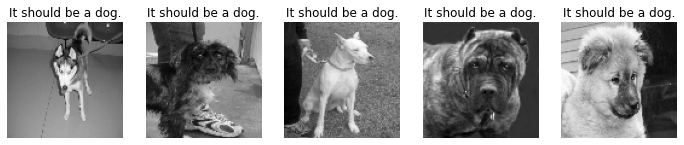

In [38]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

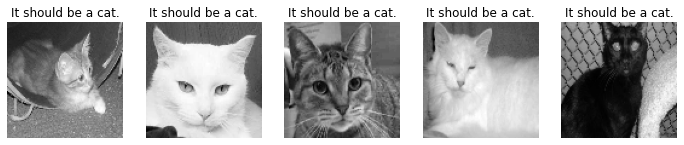

In [39]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [40]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [41]:
y_dogs[:5]

[1, 1, 1, 1, 1]

In [42]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [43]:
X_train = np.concatenate((dogs,cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [44]:
len(X_train)

2222

In [45]:
## One-Hot Encoding
##y_train = tf.keras.utils.to_categorical(y_train, 2)

In [47]:
y_train.shape

(2222,)

### Test set(dog12,cat12 만들기)


In [48]:
# Test set 만들기
dogs, cats = [], []
y_dogs, y_cats = [], []

In [49]:
dog_path = os.path.join(path, 'dog.12*')
len(glob(dog_path))

611

In [50]:
## Load some our dog images (611 개 이미지)
dog_path = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL)) ## 사이즈 재구성 ROW 와 COL은 위에서 설정함
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [51]:
## Load some our cat images (611 개 이미지)
cat_path = os.path.join(path, 'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [52]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [53]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [54]:
X_test = np.concatenate((dogs,cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [55]:
len(X_test)

1222

In [56]:
y_test.shape

(1222,)

## 모델 설정

In [61]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 64)       

In [63]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [64]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 모델 학습

In [65]:
X_train.shape

(2222, 96, 96, 1)

In [66]:
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_split=0.2,
          callbacks=[checkpointer])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6864 - accuracy: 0.6114
Epoch 00001: val_loss improved from inf to 0.97635, saving model to model/dogs_vs_cats-cnn-01-0.9764.hdf5
1777/1777 [==============================] - 31s 17ms/sample - loss: 0.6859 - accuracy: 0.6123 - val_loss: 0.9764 - val_accuracy: 0.0000e+00
Epoch 2/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6506 - accuracy: 0.6301
Epoch 00002: val_loss improved from 0.97635 to 0.82655, saving model to model/dogs_vs_cats-cnn-02-0.8266.hdf5
1777/1777 [==============================] - 29s 16ms/sample - loss: 0.6507 - accuracy: 0.6308 - val_loss: 0.8266 - val_accuracy: 0.1933
Epoch 3/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6311 - accuracy: 0.6568
Epoch 00003: val_loss did not improve from 0.82655
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.6300 - accuracy: 0.6573 - val_loss: 0.9192 

Epoch 29/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0115 - accuracy: 0.9966
Epoch 00029: val_loss did not improve from 0.60545
1777/1777 [==============================] - 28s 16ms/sample - loss: 0.0114 - accuracy: 0.9966 - val_loss: 3.8262 - val_accuracy: 0.5056
Epoch 30/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9960
Epoch 00030: val_loss did not improve from 0.60545
1777/1777 [==============================] - 28s 16ms/sample - loss: 0.0131 - accuracy: 0.9961 - val_loss: 4.4176 - val_accuracy: 0.4404
Epoch 31/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9977
Epoch 00031: val_loss did not improve from 0.60545
1777/1777 [==============================] - 28s 16ms/sample - loss: 0.0123 - accuracy: 0.9977 - val_loss: 4.1021 - val_accuracy: 0.4764
Epoch 32/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9949
Epoch 00032: val_loss did not improve fr

In [70]:
from tensorflow.keras.models import load_model
model = load_model('model/dogs_vs_cats-cnn-02-0.8266.hdf5')

In [71]:
scores = model.evaluate(X_train, y_train, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

2222/2222 - 5s - loss: 0.6783 - accuracy: 0.5693
MODEL ACCURACY: 0.56931


In [72]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

1222/1222 - 3s - loss: 0.6861 - accuracy: 0.5532
MODEL ACCURACY: 0.55319
